In [204]:
%matplotlib inline
!pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from dython import nominal
import missingno as msno
from pandas.plotting import table
import dataframe_image as dfi

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-paper')
%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

from mpl_toolkits.mplot3d import Axes3D

In [205]:
df = pd.read_csv('C:/Users/Federico/Desktop/Data Science/Data Mining/Progetto/Clustering/Train_HR_Employee_Attrition_New.csv') 


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1176 non-null   float64
 1   Attrition              1176 non-null   int64  
 2   BusinessTravel         1176 non-null   int64  
 3   DistanceFromHome       1176 non-null   int64  
 4   Education              1176 non-null   int64  
 5   EducationField         1176 non-null   int64  
 6   Gender                 1176 non-null   int64  
 7   JobRole                1176 non-null   int64  
 8   MaritalStatus          1176 non-null   int64  
 9   MonthlyIncome          1176 non-null   float64
 10  OverTime               1176 non-null   int64  
 11  PercentSalaryHike      1176 non-null   int64  
 12  PerformanceRating      1176 non-null   float64
 13  StockOptionLevel       1176 non-null   int64  
 14  TotalWorkingYears      1176 non-null   int64  
 15  Trai

In [4]:
correlation=df[df.columns[0:]].corr()['Attrition'][:]
correlation.abs().sort_values(ascending=False)

Attrition                1.000000
OverTime                 0.243083
Satisfaction             0.213709
YearsInCurrentRole       0.175432
TotalWorkingYears        0.172216
MaritalStatus            0.152129
StockOptionLevel         0.144273
DistanceFromHome         0.063296
EducationField           0.059268
ChangeCompanyRate        0.049432
TrainingTimesLastYear    0.041914
PercentSalaryHike        0.032365
Education                0.028971
JobRole                  0.026019
Age                      0.022561
Gender                   0.018168
PerformanceRating        0.014869
BusinessTravel           0.005022
MonthlyIncome            0.004533
Name: Attrition, dtype: float64

In [5]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df=remove_outlier(df,'Satisfaction')
df=remove_outlier(df,'YearsInCurrentRole')
df=remove_outlier(df,'TotalWorkingYears')
df=remove_outlier(df,'TotalWorkingYears').reset_index()

In [6]:
df_new=df[["Attrition","Satisfaction","YearsInCurrentRole","TotalWorkingYears"]]
df_cluster=df[["Satisfaction","YearsInCurrentRole","TotalWorkingYears"]]

In [7]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Satisfaction        1013 non-null   int64
 1   YearsInCurrentRole  1013 non-null   int64
 2   TotalWorkingYears   1013 non-null   int64
dtypes: int64(3)
memory usage: 23.9 KB


In [8]:
df_cluster.head()

,Satisfaction,YearsInCurrentRole,TotalWorkingYears
0,13,7,20
1,16,5,7
2,12,7,12
3,16,2,2
4,18,2,4


In [9]:
df_cluster.tail()

,Satisfaction,YearsInCurrentRole,TotalWorkingYears
1008,16,0,1
1009,10,7,12
1010,11,2,5
1011,13,4,15
1012,12,0,0


In [10]:
df_cluster['Attrition'].value_counts()

KeyError: 'Attrition'

In [13]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Satisfaction        1013 non-null   int64
 1   YearsInCurrentRole  1013 non-null   int64
 2   TotalWorkingYears   1013 non-null   int64
dtypes: int64(3)
memory usage: 23.9 KB


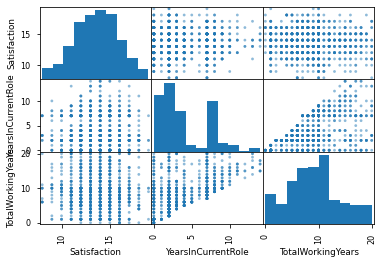

In [14]:

pd.plotting.scatter_matrix(df_cluster[['Satisfaction',"YearsInCurrentRole", 'TotalWorkingYears']])
plt.show()

In [15]:
scaler = RobustScaler()
X = scaler.fit_transform(df_cluster.iloc[:,:].values)

In [16]:
dist = pdist(X, 'cityblock')
dist = squareform(dist)
print (dist)

[[0.         3.56666667 1.66666667 ... 4.16666667 1.43333333 5.06666667]
 [3.56666667 0.         2.56666667 ... 2.6        2.53333333 3.5       ]
 [1.66666667 2.56666667 0.         ... 2.5        1.43333333 3.4       ]
 ...
 [4.16666667 2.6        2.5        ... 0.         2.73333333 1.56666667]
 [1.43333333 2.53333333 1.43333333 ... 2.73333333 0.         3.63333333]
 [5.06666667 3.5        3.4        ... 1.56666667 3.63333333 0.        ]]


In [17]:
print(X)

[[-0.33333333  0.8         2.        ]
 [ 0.66666667  0.4        -0.16666667]
 [-0.66666667  0.8         0.66666667]
 ...
 [-1.         -0.2        -0.5       ]
 [-0.33333333  0.2         1.16666667]
 [-0.66666667 -0.6        -1.33333333]]


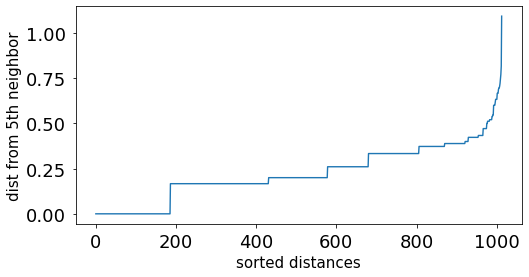

In [86]:



k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

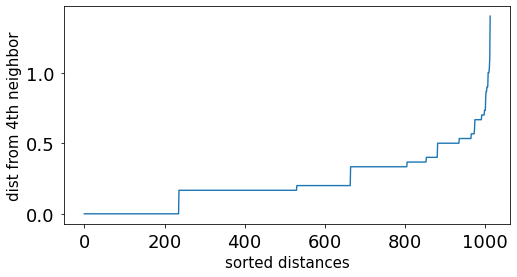

In [87]:

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 4

kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

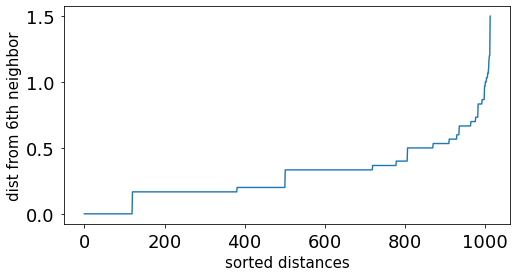

In [88]:

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 6
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

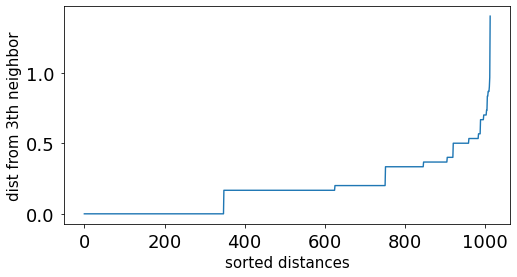

In [89]:
# Stimare il migliore eps con k=3

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

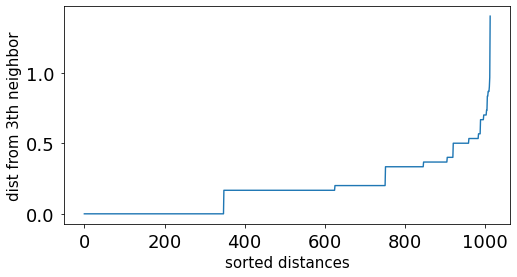

In [90]:
# Stimare il migliore eps con k=7

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

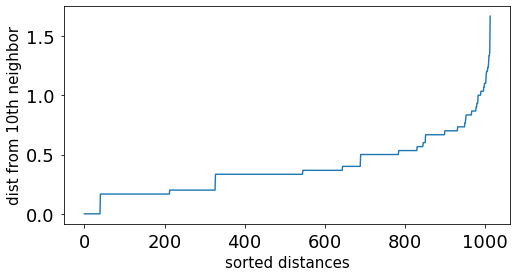

In [91]:
# Stimare il migliore eps con k=10

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 10
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

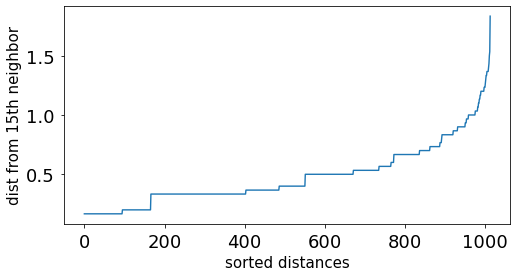

In [92]:
# Stimare il migliore eps con k=15

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 15
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

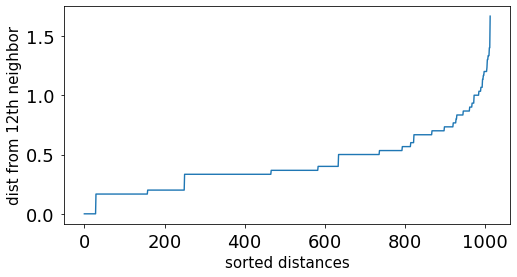

In [93]:
# Stimare il migliore eps con k=20

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 12
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

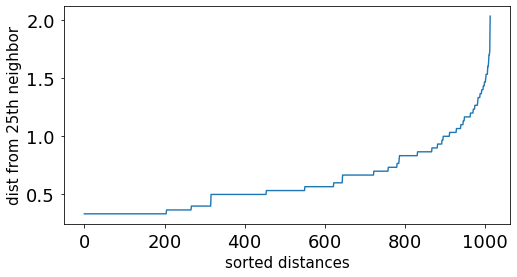

In [94]:
# Stimare il migliore eps con k=20

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 25
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

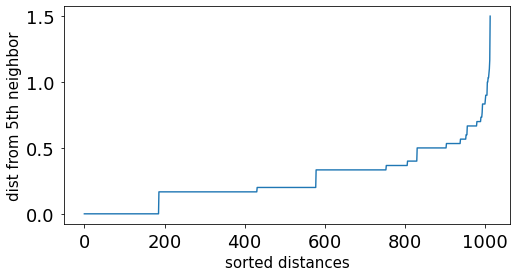

In [95]:
# Stimare il migliore eps con k=20

dist = pdist(X, 'cityblock')
dist = squareform(dist)

k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

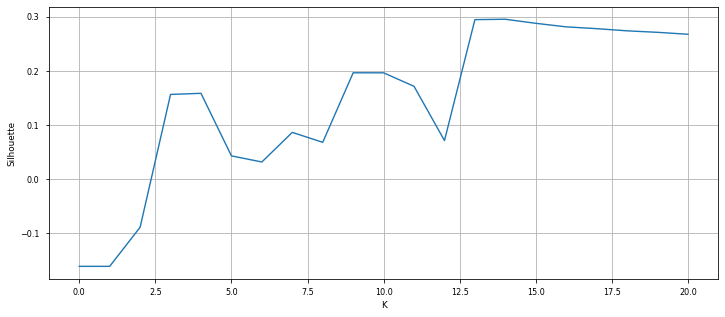

In [152]:


max_k = 20
sil_quattro = list()
for i in range(0, max_k+1):
    dbscan = DBSCAN(eps=0.4, min_samples=i,  metric='cityblock')
    dbscan.fit(X)
    sil_quattro.append(silhouette_score(X, dbscan.labels_))
    
    
plt.figure(figsize=(12,5))
plt.plot(sil_quattro)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

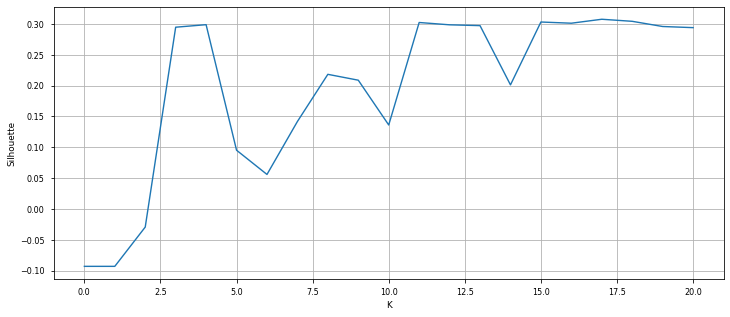

In [153]:
#provare da 0.4 a 0.75
#0.4
max_k = 20
sil_cinque = list()
for i in range(0, max_k+1):
    dbscan = DBSCAN(eps=0.5, min_samples=i,  metric='cityblock')
    dbscan.fit(X)
    sil_cinque.append(silhouette_score(X, dbscan.labels_))
plt.figure(figsize=(12,5))
plt.plot(sil_cinque)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

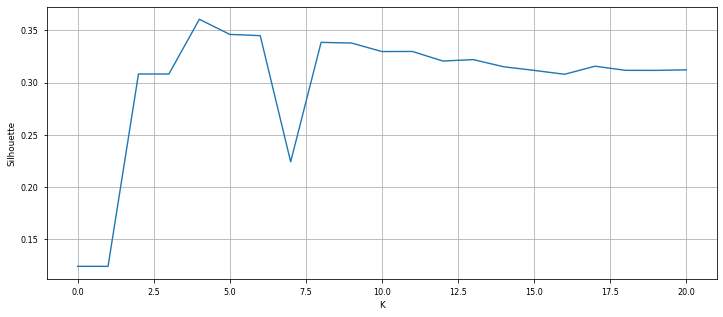

In [154]:
#provare da 0.4 a 0.75
#0.4
max_k = 20
sil_sei = list()
for i in range(0, max_k+1):
    dbscan = DBSCAN(eps=0.6, min_samples=i, metric='cityblock')
    dbscan.fit(X)
    sil_sei.append(silhouette_score(X, dbscan.labels_))
plt.figure(figsize=(12,5))
plt.plot(sil_sei)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

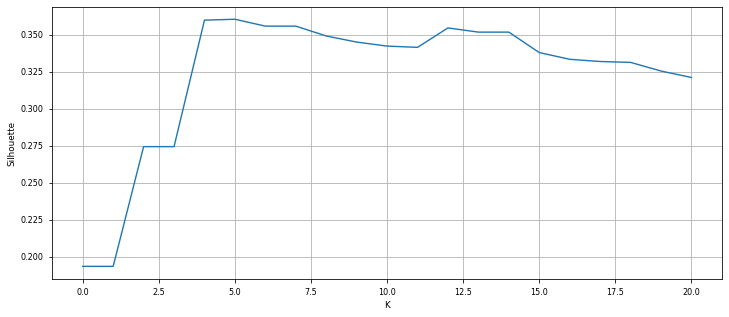

In [155]:
#provare da 0.4 a 0.75
#0.4
max_k = 20
sil_sette = list()
for i in range(0, max_k+1):
    dbscan = DBSCAN(eps=0.7, min_samples=i, metric='cityblock')
    dbscan.fit(X)
    sil_sette.append(silhouette_score(X, dbscan.labels_))
plt.figure(figsize=(12,5))
plt.plot(sil_sette)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

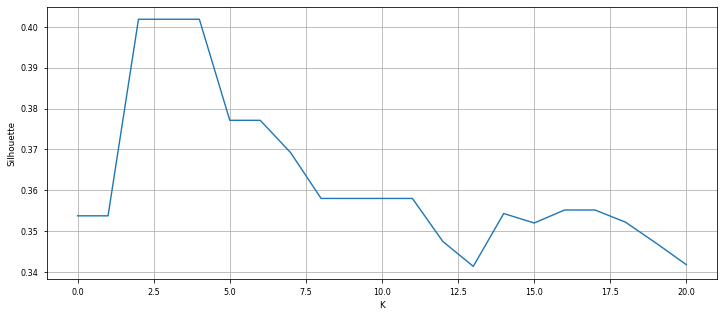

In [156]:
#provare da 0.4 a 0.75
#0.4
max_k = 20
sil_otto = list()
for i in range(0, max_k+1):
    dbscan = DBSCAN(eps=0.8, min_samples=i, metric='cityblock')
    dbscan.fit(X)
    sil_otto.append(silhouette_score(X, dbscan.labels_))
plt.figure(figsize=(12,5))
plt.plot(sil_otto)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (14,) and (0,)

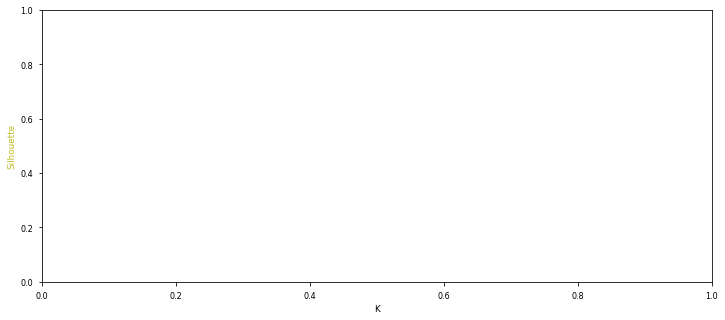

In [108]:


t = np.arange(1, 15, 1)

plt.plot
color = 'tab:olive'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t,sil_quattro, color=color)
ax1.tick_params(axis='y', labelcolor=color)



color = 'tab:grey'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t,sil_cinque, color=color)
ax1.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




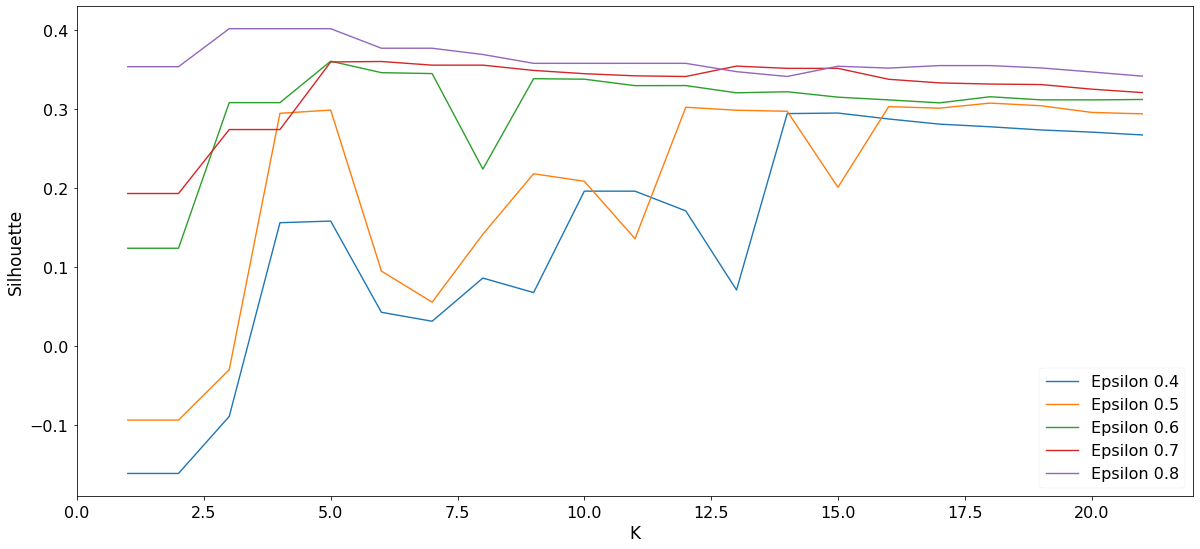

In [163]:




SMALL_SIZE = 16
MEDIUM_SIZE = 17
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(20, 9))


t = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
plt.plot(t, sil_quattro, label = "Epsilon 0.4")


plt.plot(t,sil_cinque , label = "Epsilon 0.5")
plt.plot(t,sil_sei , label = "Epsilon 0.6")

plt.plot(t,sil_sette , label = "Epsilon 0.7")

plt.plot(t,sil_otto , label = "Epsilon 0.8")


plt.xlabel('K')
# Set the y axis label of the current axis.
plt.ylabel('Silhouette')

# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()





In [223]:
dbscan = DBSCAN(eps=0.7, min_samples=13, metric='cityblock')
dbscan.fit(X)
dbscan.labels_
np.unique(dbscan,return_counts=True)


(array([DBSCAN(eps=0.7, metric='cityblock', min_samples=13)], dtype=object),
 array([1], dtype=int64))

In [224]:

print ('silhouette', silhouette_score(X, dbscan.labels_))

silhouette 0.35165280007785077


In [225]:
np.unique(dbscan.labels_, return_counts=True)


(array([-1,  0], dtype=int64), array([ 36, 977], dtype=int64))

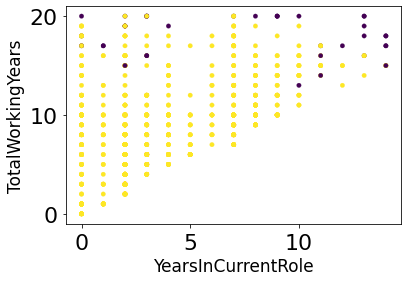

In [226]:
plt.scatter(df_cluster['YearsInCurrentRole'], df_cluster['TotalWorkingYears'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('YearsInCurrentRole')
# Set the y axis label of the current axis.
plt.ylabel('TotalWorkingYears')

plt.show()

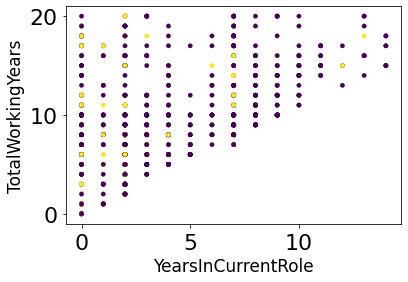

In [227]:

plt.scatter(df_cluster['YearsInCurrentRole'], df_cluster['TotalWorkingYears'], c=df_new['Attrition'], s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('YearsInCurrentRole')
# Set the y axis label of the current axis.
plt.ylabel('TotalWorkingYears')

plt.show()

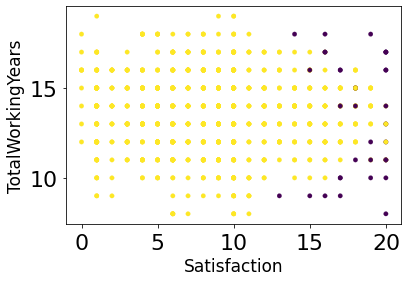

In [228]:
plt.scatter(df_cluster['TotalWorkingYears'], df_cluster['Satisfaction'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Satisfaction')
# Set the y axis label of the current axis.
plt.ylabel('TotalWorkingYears')
plt.show()

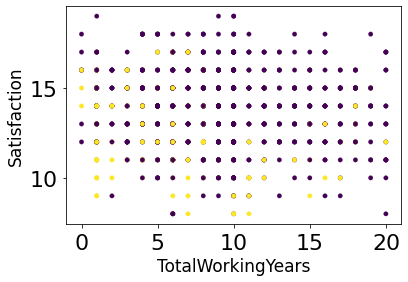

In [229]:
plt.scatter(df_cluster['TotalWorkingYears'], df_cluster['Satisfaction'], c=df_new['Attrition'], s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('TotalWorkingYears')
# Set the y axis label of the current axis.
plt.ylabel('Satisfaction')

plt.show()

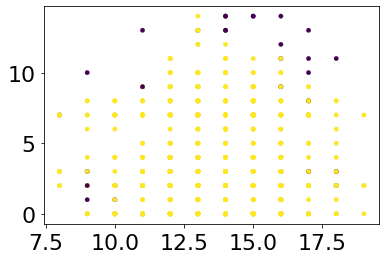

In [230]:
plt.scatter(df_cluster['Satisfaction'], df_cluster['YearsInCurrentRole'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

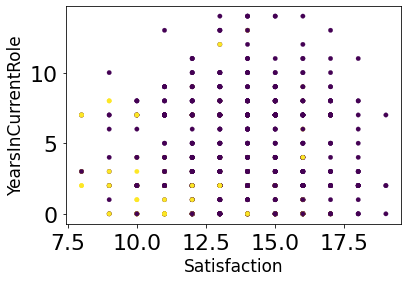

In [231]:
plt.scatter(df_cluster['Satisfaction'], df_cluster['YearsInCurrentRole'], c=df_new['Attrition'], s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Satisfaction')
# Set the y axis label of the current axis.
plt.ylabel('YearsInCurrentRole')

plt.show()